## CHILD Landscape Evolution Model
* Link to this notebook: https://github.com/csdms/pymt/blob/master/docs/demos/child.ipynb
* Install command: `$ conda install notebook pymt_child`



Import the `Sedflux3D` component from `pymt`. All of the components available to `pymt` are located in `pymt.components`. Here I've renamed the component to be `Model` to show that you could run these same commands with other models as well. For instance, you could instead import `Child` with `from pymt.components import Child as Model` and repeat this exercise with Child instead.

In [1]:
from __future__ import print_function

# Some magic to make plots appear within the notebook
%matplotlib inline

import numpy as np # In case we need to use numpy

### Run CHILD in PyMT

We'll now do the same thing but this time with the Child model. Notice that the commands will be the same. *If you know how to run one PyMT component, you know how to run them all.*

In [2]:
import pymt.models

model = pymt.models.Child()

✓ Avulsion
✓ Plume
✓ Sedflux3D
✓ Subside
✓ Hydrotrend
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/landlab/bmi/components.py:13: UserWarning: unable to wrap class Lithology
  warnings.warn('unable to wrap class {name}'.format(name=cls.__name__))
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/landlab/bmi/components.py:13: UserWarning: unable to wrap class LithoLayers
  warnings.warn('unable to wrap class {name}'.format(name=cls.__name__))
✓ Flexure
✓ OverlandFlow
✓ Child


You can now see the help information for Child. This time, have a look under the *Parameters* section (you may have to scroll down - it's the section after the citations). The *Parameters* section describes optional keywords that you can pass the the `setup` method. In the previous example we just used defaults. Below we'll see how to set input file parameters programmatically through keywords.

In [3]:
help(model)

Help on Child in module pymt.framework.bmi_bridge object:

class Child(BmiCap)
 |  Basic Model Interface for child.
 |  
 |  CHILD computes the time evolution of a topographic surface z(x,y,t) by
 |  fluvial and hillslope erosion and sediment transport.
 |  
 |  Author:
 |  - Greg Tucker
 |  - Stephen Lancaster
 |  - Nicole Gasparini
 |  - Rafael Bras
 |  - Scott Rybarczyk
 |  Version: 10.6
 |  License: GPLv2
 |  DOI: 10.1594/IEDA/100102
 |  URL: http://csdms.colorado.edu/wiki/Model:CHILD
 |  
 |  Cite as:
 |  
 |      @article{tucker2010child,
 |        title={CHILD Users Guide for version R9. 4.1},
 |        author={Tucker, Gregory E},
 |        journal={Cooperative Institute for Research in Environmental Sciences (CIRES) and Department of Geological Sciences, University of Colorado, Boulder, USA},
 |        year={2010}
 |      }
 |  
 |      @article{tucker2001object,
 |        title={An object-oriented framework for distributed hydrologic and geomorphic modeling using triangulated 

In [4]:
rm -rf _model # Clean up for the next step

We can change input file paramters through `setup` keywords. The `help` description above gives a brief description of each of these. For this example we'll change the grid spacing, the size of the domain, and the duration of the simulation.

In [5]:
config_file, initdir = model.setup('_model',
                                   grid_node_spacing=750.,
                                   grid_x_size=20000.,
                                   grid_y_size=40000.,
                                   run_duration=1e6)

The setup folder now only contains the child input file.

In [6]:
ls _model

child.in


Again, initialize and run the model for 10 time steps.

In [7]:
model.initialize(config_file, initdir)

/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__


In [8]:
for t in range(10):
    model.update()
    print(model.time)

10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0


This time around it's now quite as clear what the units of time are. We can check in the same way as before.

In [9]:
model.time_units

'year'

Update until some time in the future. Notice that, in this case, we update to a partial time step. Child is fine with this however some other models may not be. For models that can not update to times that are not full time steps, PyMT will advance to the next time step and interpolate values to the requested time.

In [10]:
model.update_until(201.5, units='year')
print(model.time)

201.5


Child offers different output variables but we get them in the same way as before.

In [11]:
model.output_var_names

('land_surface__elevation',
 'sea_bottom_surface__elevation',
 'land_surface__elevation_increment',
 'sediment__erosion_rate',
 'channel_water__discharge',
 'channel_water_sediment~bedload__mass_flow_rate')

In [12]:
model.get_value('land_surface__elevation')

array([ 0.        ,  0.        ,  0.        , ..., -0.14213881,
       -0.34210564,  0.00178402])

We can query each input and output variable. PyMT attaches a dictionary to each component called `var` that provides information about each variable. For instance we can see that `"land_surface__elevation"` has units of meters, is an input and output variable, and is defined on the nodes of grid with id 0.

In [13]:
model.var['land_surface__elevation']

<DataValues>
double land_surface__elevation(node)
Attributes:
    units: m
    grid: 0
    intent: inout
    location: node

If we plot this variable, we can visually see the unsructured triangular grid that Child has decomposed its grid into.

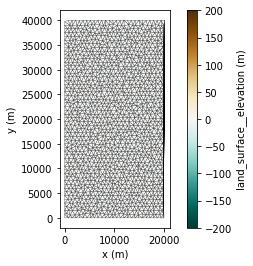

In [14]:
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

As with the `var` attribute, PyMT adds a dictionary, called `grid`, to components that provides a description of each of the model's grids. Here we can see how the x and y positions of each grid node, and how nodes connect to one another to form faces (the triangles in this case). Grids are described using the ugrid conventions.

In [15]:
model.grid[0]

<xarray.Dataset>
Dimensions:                 (face: 2914, node: 1512, vertex: 8742)
Dimensions without coordinates: face, node, vertex
Data variables:
    mesh                    int64 0
    node_x                  (node) float64 750.0 1.5e+03 ... 1.939e+04 1.96e+04
    node_y                  (node) float64 0.0 0.0 0.0 ... 3.839e+04 3.883e+04
    face_node_connectivity  (vertex) int32 211 106 107 210 107 ... 79 80 78 79
    face_node_offset        (face) int64 3 6 9 12 15 ... 8733 8736 8739 8742

Child initializes it's elevations with random noise centered around 0. We would like instead to give it elevations that have some land and some sea. First we'll get the x and y coordinates for each node along with their elevations.

In [16]:
x, y = model.get_grid_x(0), model.get_grid_y(0)
z = model.get_value('land_surface__elevation')

/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__


All nodes above `y=y_shore` will be land, and all nodes below `y=y_shore` will be sea.

In [17]:
y_shore = 15000.
z[y < y_shore] -= 100
z[y >= y_shore] += 100

In [18]:
model.set_value('land_surface__elevation', z)

array([-100.        , -100.        , -100.        , ...,   99.85786119,
         99.65789436,  100.00178402])

Just to verify we set things up correctly, we'll create a plot.

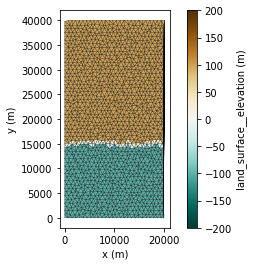

In [19]:
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

To get things going, we'll run the model for 5000 years and see what things look like.

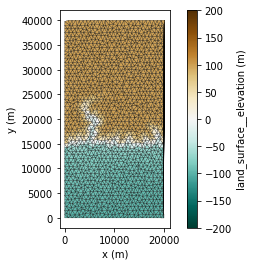

In [20]:
model.update_until(5000.)
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

We'll have some fun now by adding a simple uplift component. We'll run the component for another 5000 years but this time uplifting a corner of the grid by `dz_dt`.

In [21]:
dz_dt = .02
now = model.time
times, dt = np.linspace(now, now + 5000., 50, retstep=True)
for time in times:
    model.update_until(time)
    z = model.get_value('land_surface__elevation')
    z[(y > 15000.) & (x > 10000.)] += dz_dt * dt
    model.set_value('land_surface__elevation', z)

A portion of the grid was uplifted and channels have begun eroding into it.

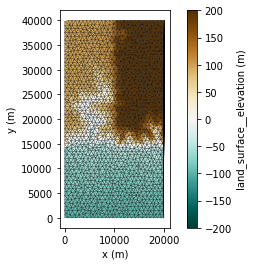

In [22]:
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

We now stop the uplift and run it for an additional 5000 years.

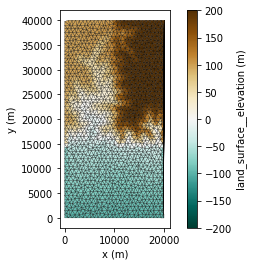

In [23]:
model.update_until(model.time + 5000.)
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

In [24]:
model.get_value('channel_water_sediment~bedload__mass_flow_rate')

array([  3.03531373e+09,   1.33561968e+10,   5.64027942e+09, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])